1. Importing libraries 

In [285]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, warnings, os
warnings.filterwarnings('ignore')

In [286]:
import my_eda_functions
import importlib
importlib.reload(my_eda_functions)

<module 'my_eda_functions' from '/Users/abhisheksaurav/Desktop/real_estate_project/notebooks/my_eda_functions.py'>

2. Reading the data 

In [287]:
PROJECT_DIR  = "/Users/abhisheksaurav/Desktop/real_estate_project/"
DATA_DIR = "Data Collection/Data/City/chandigarh/cleaned_data"

In [288]:
def get_data(name):
    file_name = "{}.csv".format(name)
    file_path = os.path.join(PROJECT_DIR, DATA_DIR, file_name)
    return pd.read_csv(file_path)

In [289]:
data = get_data("gurgaon_properties_cleaned_v2")

In [290]:
data = data.drop_duplicates()

1. Price vs property_type

property type
flat     1.380
house    3.575
Name: price, dtype: float64
Summary of property type vs price
                count      mean       std   min    25%    50%     75%   max
property type                                                              
flat           2868.0  1.708560  1.387176  0.16  0.900  1.380  2.0425  15.0
house           926.0  4.906868  4.670685  0.07  1.185  3.575  7.0000  31.5


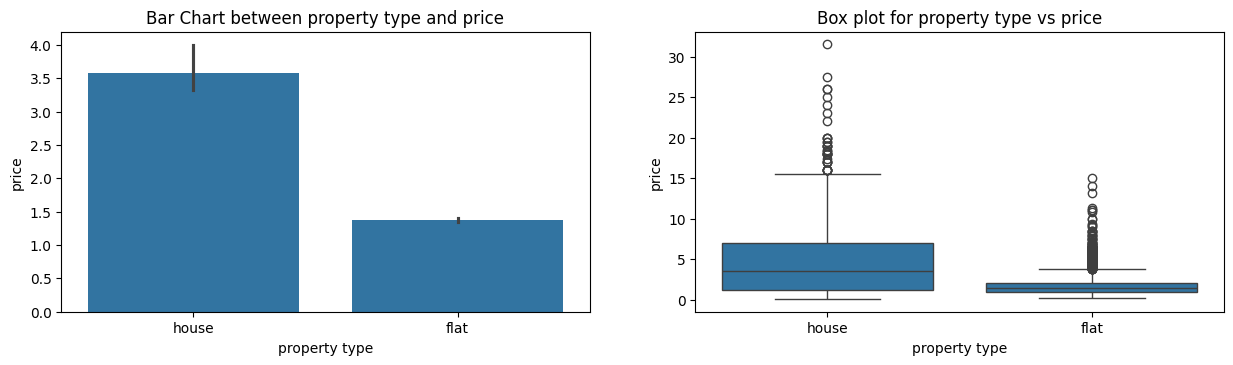

In [291]:
my_eda_functions.cat_num_bivar(data, 'property type', 'price')

Observations: 
1. Median price of houses are around 3.5 crores and flats are 1.3 crores. 
2. Box plot indicated that the prices of houses are in wider range than the flats. 
3. House prices are in the range of 0 to around 15 crores whereas flat prices are around 0 to 5 crores. 
4. Least price of a flat is 16 lakhs where as the maximum flat price is 15 crores 
5. Least price of a house is 7 lakhs where as maximum house price is 31 crores. 
6. 25% of the flats are priced below 90 lakhs whereas for house it's around 1.2 crores. 
7. 50% of the flats are priced below 1.4 crores whereas for house it's around 3.5 crores 
8. 75% of the flats are priced below 2 crores whereas for house it's 7 crores. 

2. property type vs area 

2.1 Super_built_up_area 

property type
flat     1623.5
house    1557.0
Name: built_up_area, dtype: float64
Summary of property type vs built_up_area
               count         mean           std   min        25%     50%  \
property type                                                              
flat           900.0  2530.379743  24525.549530  97.0  1275.8825  1623.5   
house          885.0  2111.867638   2084.990937   2.0   558.0000  1557.0   

                  75%       max  
property type                    
flat           2000.0  737147.0  
house          3000.0   26000.0  


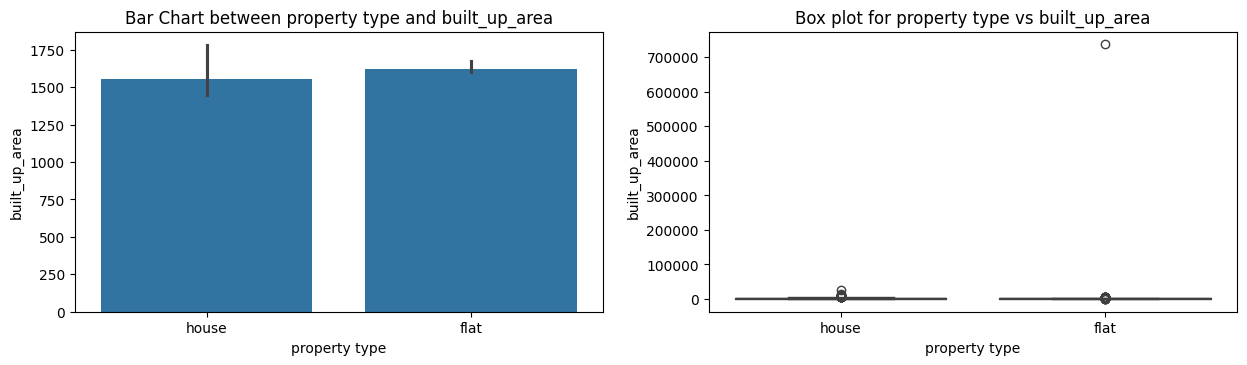

In [292]:
my_eda_functions.cat_num_bivar(data, 'property type', 'built_up_area')

In [293]:
data = data[data['built_up_area'] != 737147.0]

property type
flat     1622.0
house    1557.0
Name: built_up_area, dtype: float64
Summary of property type vs built_up_area
               count         mean          std   min       25%     50%  \
property type                                                            
flat           899.0  1713.231111   737.893725  97.0  1275.765  1622.0   
house          885.0  2111.867638  2084.990937   2.0   558.000  1557.0   

                  75%      max  
property type                   
flat           2000.0   5350.0  
house          3000.0  26000.0  


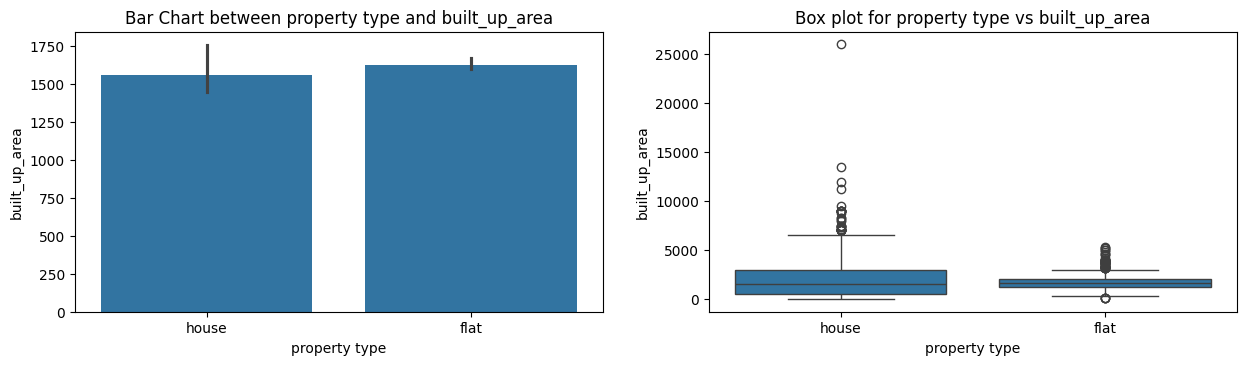

In [294]:
my_eda_functions.cat_num_bivar(data, 'property type', 'built_up_area')

Observation
1. built up area of flats are little higher in comparison to the houses, which is not generally true.
2. median buit up area of flats are around 1622 square feet where as for house it's 1557 square feet. 
3. Box plot is not able to generate any useful information due to the presence of outliers. 
4. Least buit up area of flats is 97.0 square feet where as the maximum flat built up area is now 5350.0 square feet which indicates the presence of outliers on both ends. 
5. Least buit up area of a house is 2.0 square feets where as maximum built up area of a house is 26000. 
6. 25% of the flats's buit up area is below 1275.8825 square feet whereas for house it's around 558 square feet. 
7. 50% of the flats's buit up area is below 1623.5 square feet whereas for house it's around 1557.0 square feet 
8. 75% of the flats's buit up area is below 2000.0 square feet whereas for house it's 3000.0 square feet. 
9. Removed the single outlier present for the built up area of flat due to which box plot was not usable. 
10. House's built up area in larger range than the flat's built up area. 

3. property type vs price_per_sq_ft

property type
flat      8333.0
house    19178.0
Name: price_per_sq_ft, dtype: float64
Summary of property type vs price_per_sq_ft
                count          mean           std  min      25%      50%  \
property type                                                              
flat           2867.0   9323.483781   5581.977049  5.0   6491.0   8333.0   
house           926.0  28075.284017  42348.528955  2.0  10079.0  19178.0   

                    75%       max  
property type                      
flat           11058.00  200000.0  
house          30349.75  600000.0  


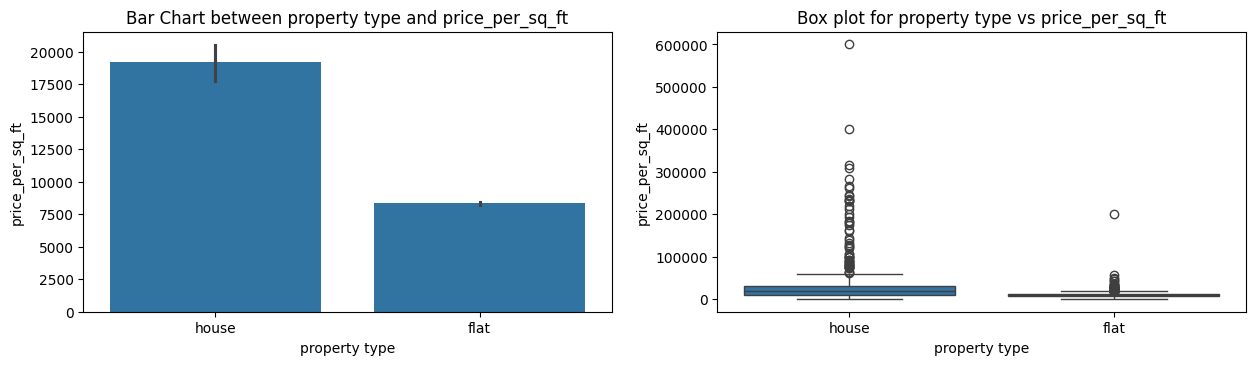

In [295]:
my_eda_functions.cat_num_bivar(data, "property type", "price_per_sq_ft")

In [296]:
# checking for outliers 

data[data['price_per_sq_ft'] > 100000].shape

(33, 23)

In [297]:
(
    data[data['price_per_sq_ft'] > 200000]
    .sample(3)
)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
826,house,dlf the grove,sector 54,5.70,211111.0,270.0,Built Up area: 270 (25.08 sq.m.),4,4,No,...,NaN,270.0,NaN,0,0,0,0,0,0,46
3450,house,unitech deerwood chase,sector 50,8.45,235376.0,359.0,Plot area 359(33.35 sq.m.),3,3,2,...,NaN,359.0,NaN,1,1,0,0,0,2,102
699,house,ansal,sector 8,1.85,308333.0,60.0,Plot area 60(5.57 sq.m.),8,8,3+,...,NaN,60.0,NaN,0,0,0,0,0,0,53


Observation. 
1. houses are on an average priced around 20000 rupees square feet whereas flats are priced around 8000 rupees per square feet. 
2. Rate of house per square feet is little high on the higher end which indicates the presence of an anamoly there where as flat's is reasonable. 
3. There is a single house which has price per square feet above 600000 per square feet which is clearly an outliers, i will perform further analysis for the reason behind this. 
4. Instead of removing this column i will try to fix these anamollies. 

4. property type vs bedRoom

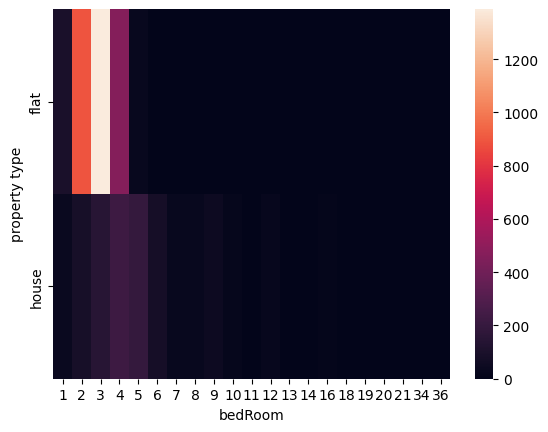

In [298]:
sns.heatmap(pd.crosstab(data['property type'], data['bedRoom']))
plt.show()

Observations: 

1. Flats with 2, 3, 4 bed rooms are most common where as for houses 4 and 5 bedrooms are common. 

In [299]:
# outlier analysis 

data[data['bedRoom'] > 10].shape

(53, 23)

- There are 53 properties with more than 10 bedrooms. 
- upon initial inspection of the data it's found that thesse are not outliers but data errors. 

5. property type vs floor num

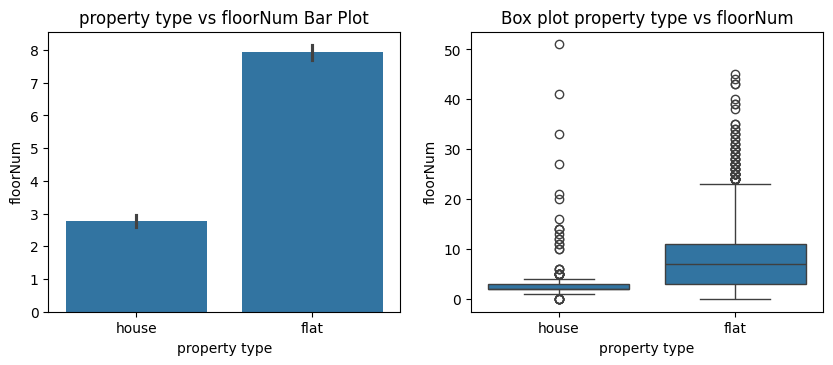

In [300]:
my_eda_functions.cat_cat_bivar(data, 'property type', 'floorNum')

In [303]:
# outlier analysis 

data[(data['property type'] == 'house') & (data['floorNum'] > 10)].sample(3)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
130,house,suncity avenue 76,sector 76,0.75,10067.0,745.0,Plot area 745(69.21 sq.m.)Built Up area: 745 s...,2,2,2,...,NaN,745.0,NaN,0,0,0,0,0,0,40
634,house,vatika the seven lamps,sector 82,1.60,6597.0,2425.0,Plot area 2425(225.29 sq.m.),4,4,3+,...,NaN,2425.0,NaN,0,1,0,0,0,0,94
3894,house,indiabulls centrum park,sector 103,3.25,8125.0,4000.0,Plot area 4000(371.61 sq.m.),4,3,3+,...,NaN,4000.0,NaN,0,0,0,0,0,0,51


Observations: 
1. Houses are mostly around 3 floors and flats are around 8 floors. Which is valid becasue independent houses are usually not high rise buildings and flats are usually on the multi storey buildings. 
2. Upon further analysis it's been observed that these houses are actually penthouses which are usually located on the top floors of the apartments buildings. 
3. These are expensive properties built on top of the apartments. 


6. property_type vs agePossession

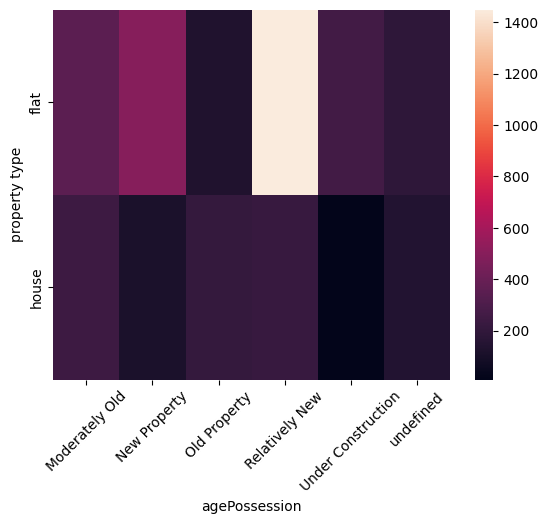

In [308]:
sns.heatmap(pd.crosstab(data['property type'], data['agePossession']))
plt.xticks(rotation = 45)
plt.show()

Observation
1. `Relatively new` properties are higher in the flats in comparison to the houses. 
2. houses are mostly relatively old. 
3. So we can conclude that the new properties which are being built in gurgaon are mostly  flats in comparison to the houses. 

property type vs agePossession - average prices

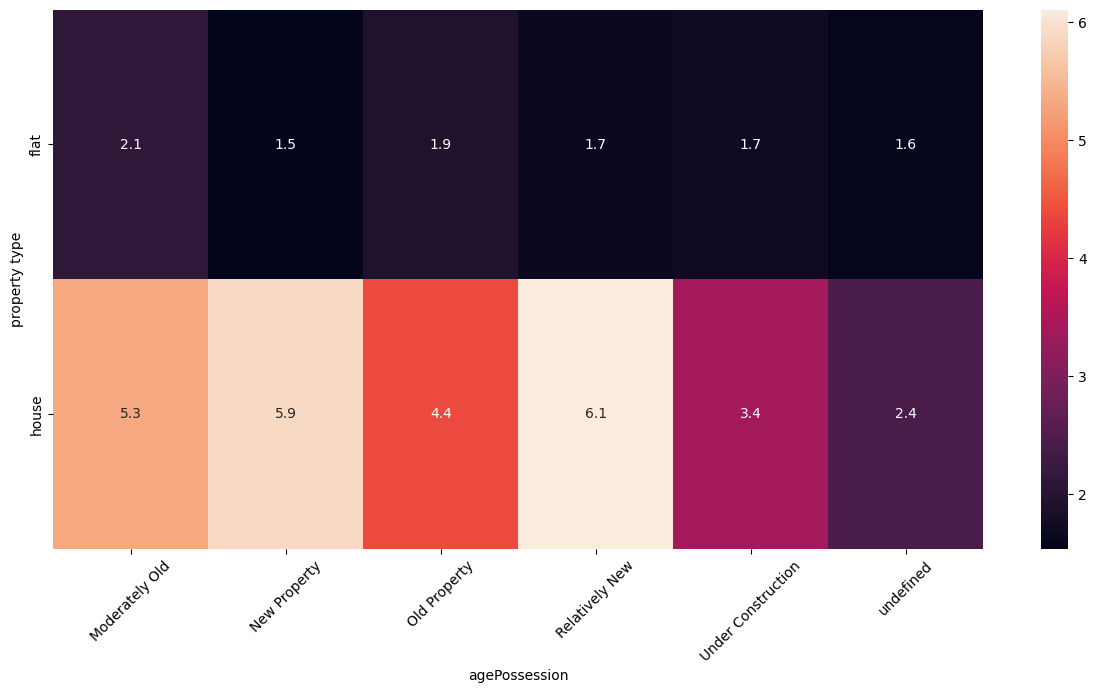

In [321]:
plt.figure(figsize= (15, 7))
sns.heatmap(pd.pivot_table(data,
               index= 'property type', 
               columns= 'agePossession', 
               values = 'price', 
               aggfunc= 'mean'), annot= True)
plt.xticks(rotation = 45)
plt.show()

Observation
1. For all categories prices of houses are higher than the flats. 
2. If we look at the price individually: 
    - For Moderately old properties: 
        - flats - 2.1 crores
        - houses - 5.3 crores
    - For New Property 
        - flats - 1.5 crores
        - houses - 5.9 crores 
    - For Old Property
        - flats - 1.9 crores 
        - houses - 4.4 crores 
    - For Relatively new property 
        - flats - 1.7 crores 
        - houses - 6.1 crores 
    - For under construcion 
        - flats - 1.7 crores 
        - houses - 3.4 crores 
    - For undefined 
        - flats - 1.6 crores 
        - houses - 2.4 crores

3. From here we can conclude that right now budget flats are under construction in gurgaon.  
4. For houses we can conclude that older the house gets lower the price 


7. property type vs bedRoom vs prices

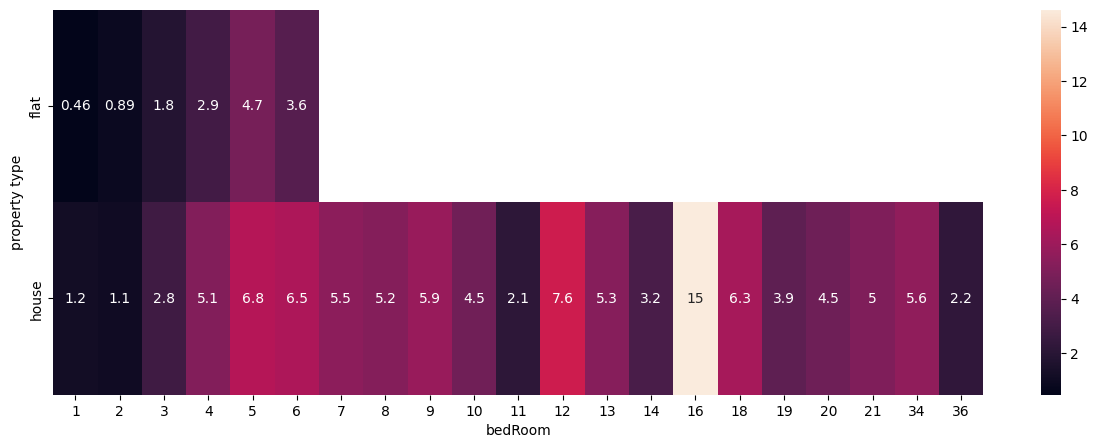

In [329]:

plt.figure(figsize= (15, 5))
sns.heatmap(pd.pivot_table(data, 
               index= 'property type', 
               columns= 'bedRoom', 
               values = 'price', 
               aggfunc= 'mean'),annot= True)
plt.show()

Observation
1. So the flat prices are increasing with the increase in the number of bedRooms except one anamoly where the 6 bedroom flats are less expensive than the 5 bedroom flats. 
2. Similaryly houses with 16 bedroom is significantly higher than other houses. 
3. For houses also the prices are increasing with the number of rooms but there are some analmolies in between which may be possible due to some data errors. 

8. property type vs furnishing type

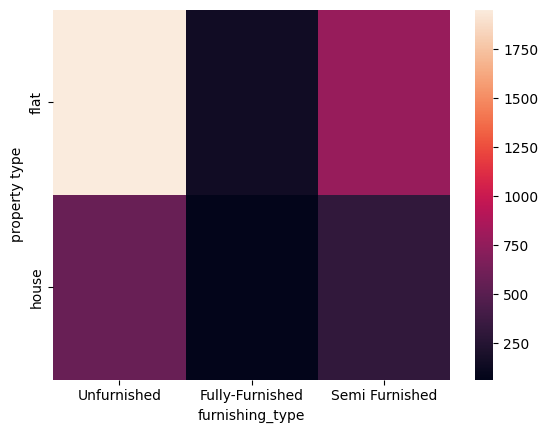

In [345]:
sns.heatmap(pd.crosstab(data['property type'], data['furnishing_type']))
plt.xticks(ticks = [0.5, 1.5, 2.5], labels=["Unfurnished", "Fully-Furnished", "Semi Furnished"])
plt.show()

Observation. 
1. Most of the flats are unfurnished, then fully furnished and unfurnished. 

9. property type vs furninshing type vs price

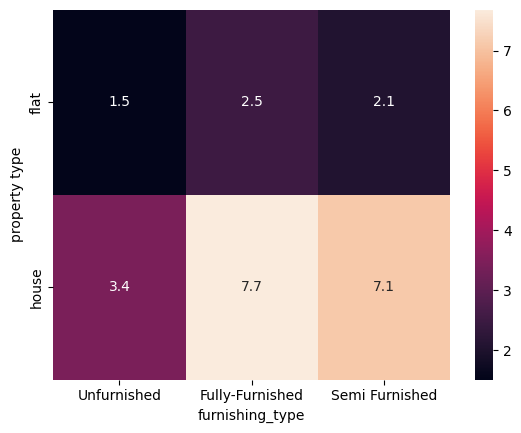

In [344]:
sns.heatmap(pd.pivot_table(data, 
               index= 'property type', 
               columns= 'furnishing_type', 
               values = 'price', 
               aggfunc= 'mean'), annot= True)
plt.xticks(ticks = [0.5, 1.5, 2.5], labels=["Unfurnished", "Fully-Furnished", "Semi Furnished"])
plt.show()

Observation
- Prices of house and flats are lower for unfurnished. 
- Prices are little higher for the semi furnished 
- Prices are highest for fully furnished. 
- these are valid also as the furnishing cost adds up to the price of the flats. 

10. property type vs luxary score 

property type
flat     66.0
house    29.0
Name: luxary_score, dtype: float64
Summary of property type vs luxary_score
                count       mean        std  min   25%   50%     75%    max
property type                                                              
flat           2868.0  77.930614  52.222884  0.0  42.0  66.0  117.00  174.0
house           944.0  45.260593  48.729325  0.0   0.0  29.0   72.25  160.0


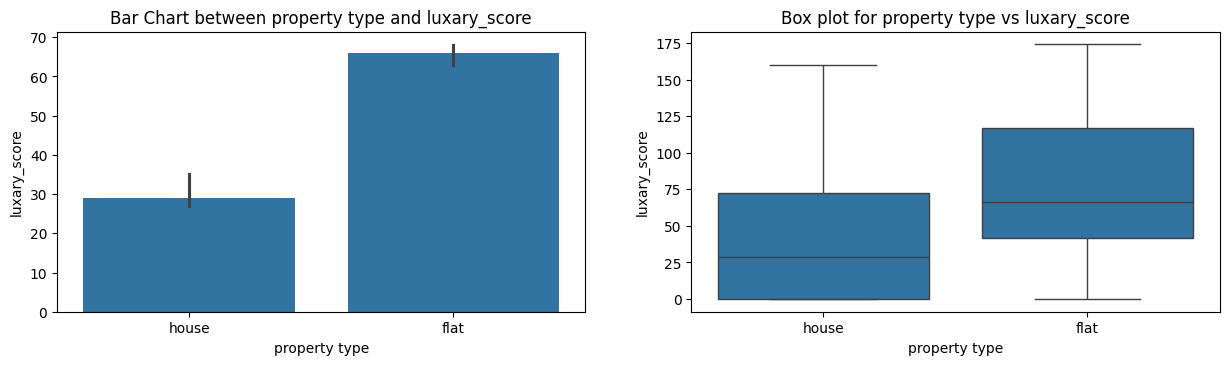

In [348]:
my_eda_functions.cat_num_bivar(data, "property type", "luxary_score")

Observation.
1. Flats have higher luxary score in comparison to the house which is valid as well because many amneties are present in the apartments than the independent hosues like swimming pool, gold course etc. 
2.  Box plot revels that there are no outliers in the data. 
3. houses have luxary score in the lower range which ranges from to 0 - 75 whereas for the flats mostly the luxary score stands in between 50-125. 

11. sector analysis